In [1]:
from crashback import Crashback
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_figures (C):
    """Utility function to plot output from simulations."""
    fig, axs = plt.subplots(2,1, sharex=True, figsize=(6.5,4.))
    for i in range(2):
        for axis in ['top', 'bottom', 'left', 'right']:
            axs[i].spines[axis].set_linewidth(0.25)  
            axs[i].xaxis.set_tick_params(width=0.25)
        axs[i].yaxis.set_tick_params(width=0.25)
    
    axs[0].set_title('Position')
    axs[0].plot(C.time,C.pos)
    axs[0].set_ylim(bottom=0)
    axs[0].set_ylabel(r'$x$ (m)')
    
    axs[1].set_title('Velocity')
    axs[1].plot(C.time,C.vel)
    axs[1].set_xlim(left=0)
    axs[1].set_ylim(bottom=0)
    axs[1].set_ylabel(r'$\dot{x}$ (m/s)')
    axs[1].set_xlabel('Time (s)')
    
    fig.subplots_adjust(wspace=0.3, hspace=0.2)
    # plt.savefig('state.pdf', bbox_inches='tight', format='pdf', dpi=300)
    plt.show()
    
    
    fig, axs = plt.subplots(3,1, sharex=True, figsize=(6.5,6.))
    for i in range(3):
        for axis in ['top', 'bottom', 'left', 'right']:
            axs[i].spines[axis].set_linewidth(0.25)  
            axs[i].xaxis.set_tick_params(width=0.25)
        axs[i].yaxis.set_tick_params(width=0.25)
        
    axs[0].set_title('Propeller Details')
    axs[0].plot(C.time,C.rpm)
    axs[0].set_ylabel(r'RPM')
    axs[0].axhline(y = 0., color = 'black', linestyle = '--', lw=0.3)
    
    axs[1].axhline(y = 90., color = 'black', linestyle = '--', lw=0.3)
    axs[1].plot(C.time,np.degrees(C.beta))
    axs[1].set_ylim(bottom=0,top=180)
    axs[1].set_ylabel(r'$\beta$ (deg)')
    axs[1].set_yticks([0,30,60,90,120,150,180])
    
    axs[2].plot(C.time,C.thrust,label='Thrust')
    axs[2].plot(C.time,C.drag,label='Drag')
    axs[2].set_ylabel(r'Force (N)')
    axs[2].legend(frameon=False,loc='upper right')
    
    axs[2].set_xlim(left=0)
    # axs[2].set_ylim(bottom=0)
    axs[2].axhline(y = 0., color = 'black', linestyle = '--', lw=0.3)
    axs[2].set_xlabel('Time (s)')
    
    fig.subplots_adjust(wspace=0.3, hspace=0.1)
    # plt.savefig('propeller.pdf', bbox_inches='tight', format='pdf', dpi=300)
    plt.show()

# Specify Ship Particulars

Here we use the ONRT.

In [2]:
# model scale
Lwl_m = 3.147 # [m] length over waterline, ref. Delen23
WSA_m = 1.536 # [m^2] wetted surface area, fully appended, ref. Delen23
Disp_m = 0.0724 # [m^3] volumetric displacement, ref. Delen23
D_m = 0.1066 # [m] propeller diameter, ref. Delen24
scale = 48.90 # scale factor, ref. Delen23
rho_m = 1000 # [kg/m^3] assumed freshwater

# ship scale
Lwl_s = Lwl_m*scale # full-scale length over waterline
WSA_s = WSA_m*scale**2 # full-scale wetted surface area
Disp_s = Disp_m * scale**3 # full-scale displacement
m_s = Disp_s*rho_m # full-scale mass
D_s = scale*D_m # full-scale propeller diameter

nProp = 2 # number of propellers

# Start up from rest

Vessel initially starts with a speed of zero. Propeller RPM is ramped up from 0 to 60 over a period of 60 seconds.

In [3]:
u0 = 0 # [m/s] initial forward speed
tf = 60 # seconds
rpm = [0,60] # ramp up to 100 rpm 
max_time = 500 # seconds

C = Crashback(m_s,tf,rpm_shape=rpm,L=Lwl_s,WSA=WSA_s,D=D_s,nProp=nProp)
C.solve(max_time=max_time, dt=0.01, x0=[0,u0])

...time  0.0  of  500
...time  50.0  of  500
...time  100.0  of  500
...time  150.0  of  500
...time  200.0  of  500
...time  250.0  of  500
...time  300.0  of  500
...time  350.0  of  500
...time  400.0  of  500
...time  450.0  of  500
...time  500.0  of  500


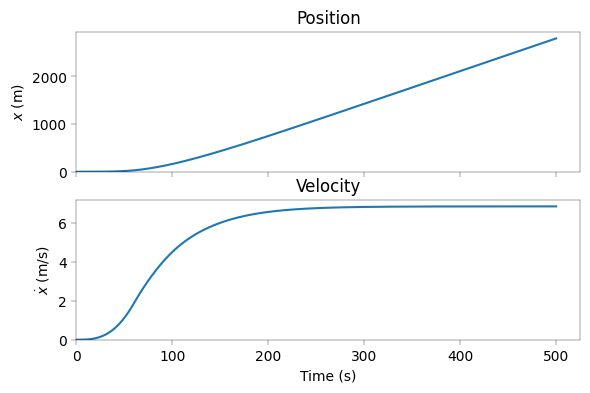

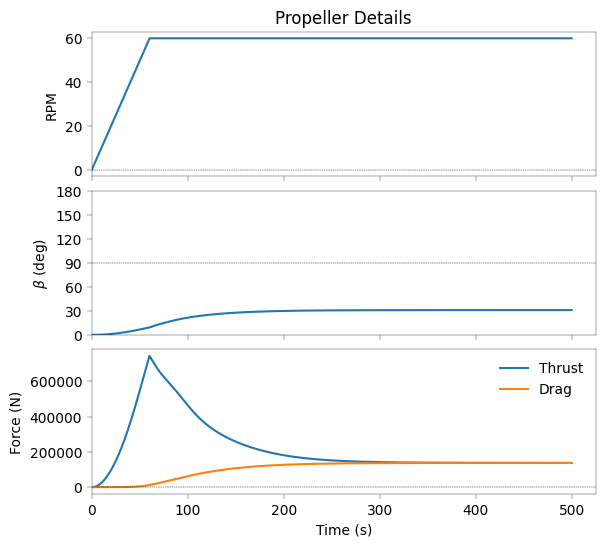

In [5]:
plot_figures(C)

# Drift from steady state

Vessel initially starts at a steady state speed. Propeller RPM is zero for the entire time.

In [6]:
u0 = 6.8724 # final speed for start up simulation
tf = 60
rpm = [0,0]
max_time = 500

C = Crashback(m_s,tf,rpm_shape=rpm,L=Lwl_s,WSA=WSA_s,D=D_s,nProp=nProp)
C.solve(max_time=max_time, dt=0.01, x0=[0,u0])

...time  0.0  of  500
...time  50.0  of  500
...time  100.0  of  500
...time  150.0  of  500
...time  200.0  of  500
...time  250.0  of  500
...time  300.0  of  500
...time  350.0  of  500
...time  400.0  of  500
...time  450.0  of  500
...time  500.0  of  500


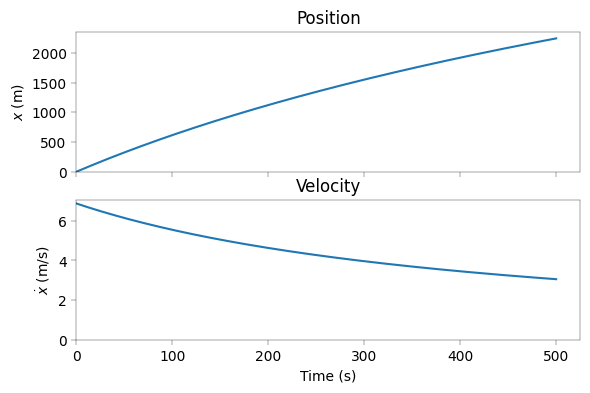

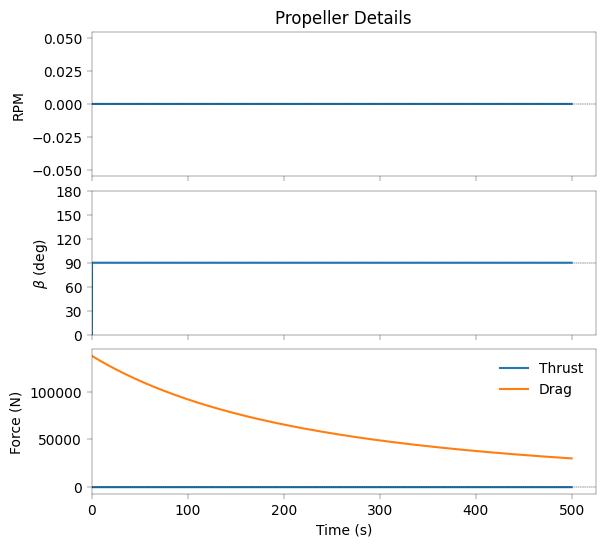

In [7]:
plot_figures(C)

# Reduce RPM from steady state

Vessel initially starts at a steady state speed. Propeller RPM is ramped down from 60 rpm (to match the steady state speed) to zero.

Notice propeller generates negative thrust in this scenario...

In [8]:
u0 = 6.8724 # final speed for start up simulation
tf = 60
rpm = [60,0]
max_time = 500

C = Crashback(m_s,tf,rpm_shape=rpm,L=Lwl_s,WSA=WSA_s,D=D_s,nProp=nProp)
C.solve(max_time=max_time, dt=0.01, x0=[0,u0])

...time  0.0  of  500
...time  50.0  of  500
...time  100.0  of  500
...time  150.0  of  500
...time  200.0  of  500
...time  250.0  of  500
...time  300.0  of  500
...time  350.0  of  500
...time  400.0  of  500
...time  450.0  of  500
...time  500.0  of  500


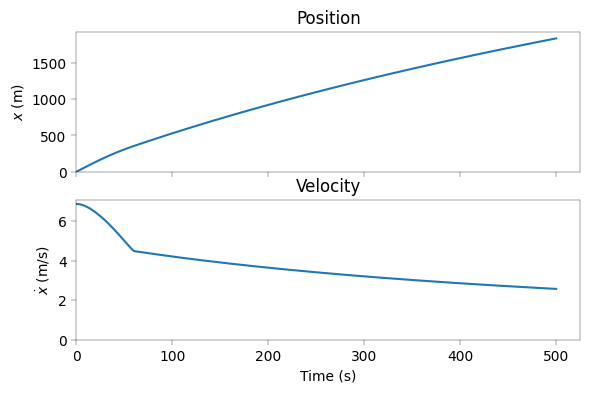

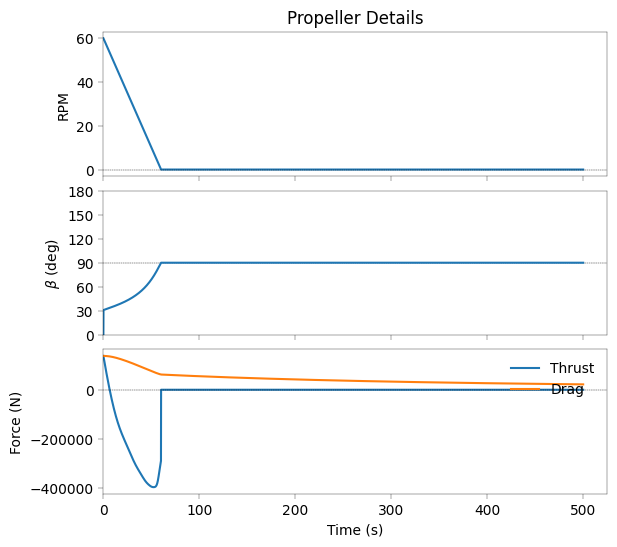

In [9]:
plot_figures(C)

# Crashback simulation

Vessel initially starts at a steady state speed. Propeller RPM is ramped down from 60 rpm (to match the steady state speed) to negative 60 rpm in a crashback scenario.

In [10]:
u0 = 6.8724
tf = 120
rpm = [60,-60]
max_time = 150

C = Crashback(m_s,tf,rpm_shape=rpm,L=Lwl_s,WSA=WSA_s,D=D_s,nProp=2)
C.solve(max_time=max_time, dt=0.01, x0=[0,u0])

...time  0.0  of  150
...time  15.0  of  150
...time  30.0  of  150
...time  45.0  of  150
...time  60.0  of  150
...time  75.0  of  150
...time  90.0  of  150
...time  105.0  of  150
...time  120.0  of  150
...time  135.0  of  150
...exiting on Beta = 180 degrees.


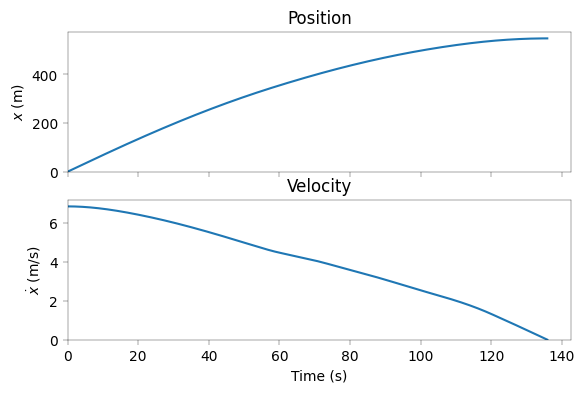

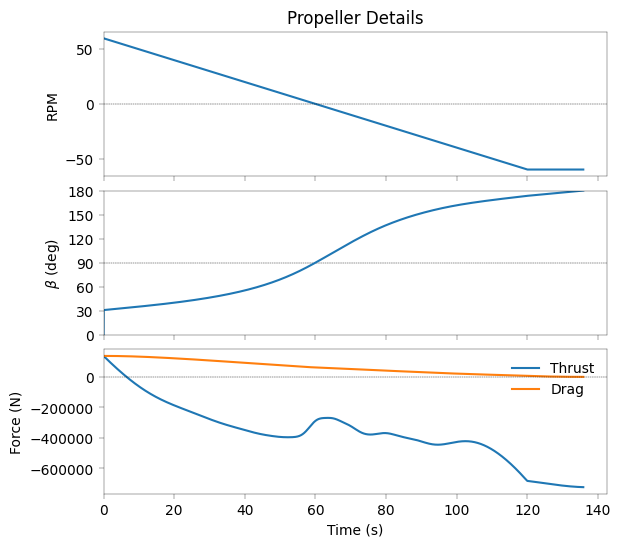

In [11]:
plot_figures(C)